In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'D:\Projects\AI Fitness Tracker\Functions')

from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction





In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

In [3]:
df = pd.read_pickle('D:\Projects\AI Fitness Tracker\Pre processed data\data_without_outliers.pkl')

In [4]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        8997 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        8969 non-null   float64
 4   gyr_y        8885 non-null   float64
 5   gyr_z        8951 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


In [6]:
predictor_column = list(df.columns[:6])

In [7]:
for col in predictor_column:
    df[col] = df[col].interpolate(method='linear', limit_direction='forward')



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


<Axes: xlabel='epoch (ms)'>

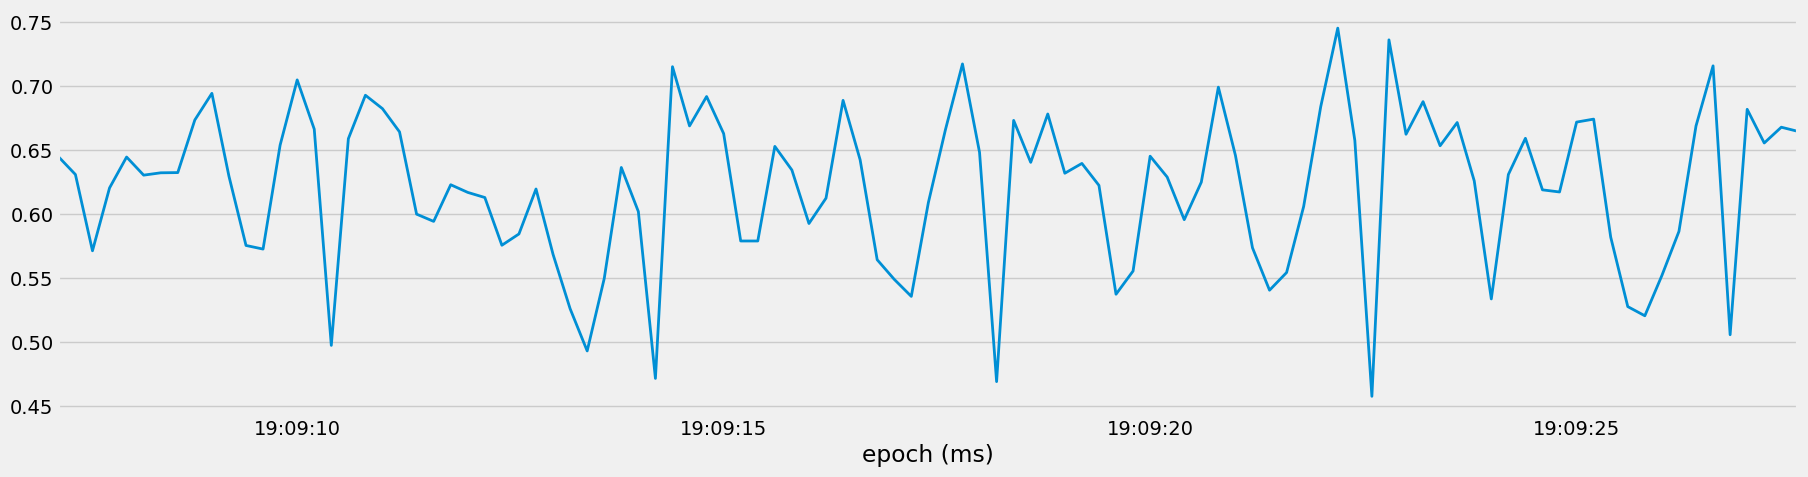

In [9]:
df[df['set']== 25]['acc_y'].plot()

<Axes: xlabel='epoch (ms)'>

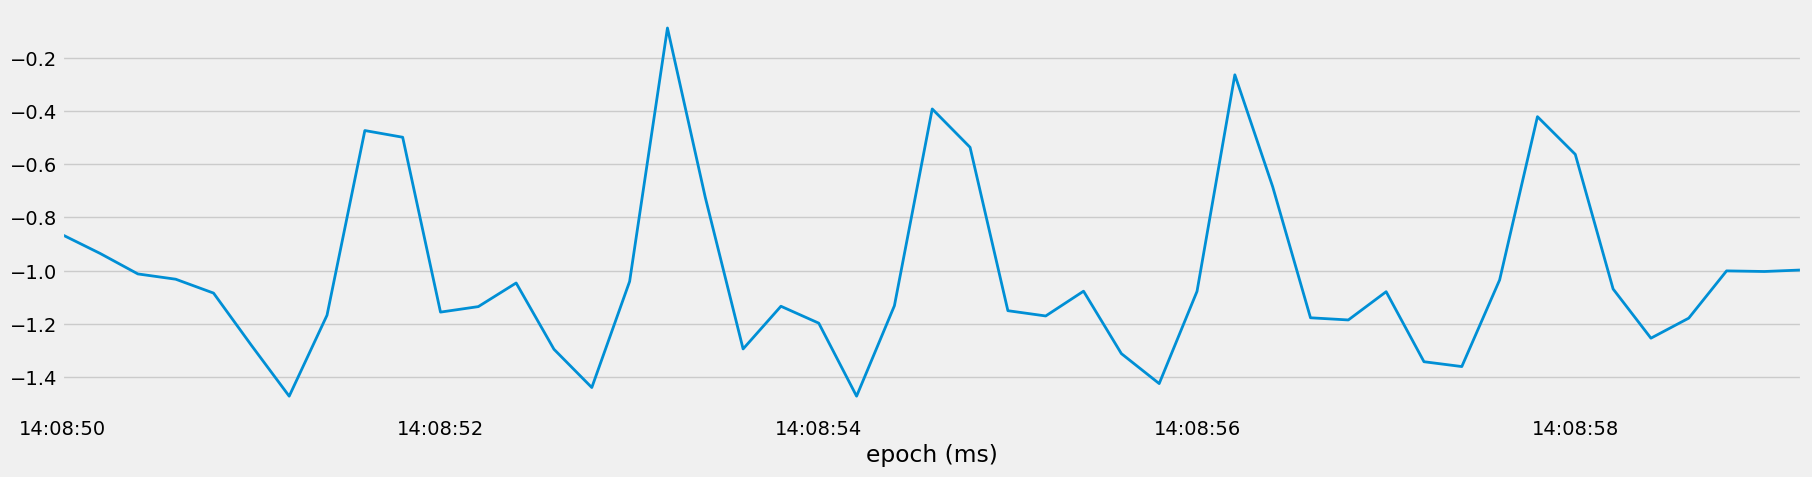

In [10]:
df[df['set']== 50]['acc_y'].plot()

In [11]:
duration = df[df['set']== 1].index[-1]-df[df['set']== 1].index[0]

In [12]:
duration

Timedelta('0 days 00:00:16.400000')

In [13]:
duration.seconds

16

In [14]:
for s in df['set'].unique():
    start = df[df['set']== s].index[0]
    stop = df[df['set']== s].index[-1]
    duration = stop-start
    df.loc[df['set']== s, 'duration'] = duration.seconds
    

df_category = df.groupby(["category"])['duration'].mean()
df_category
    

    

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [15]:
df_category.iloc[0] = df_category.iloc[0]/5
df_category.iloc[1] = df_category.iloc[1]/10

In [16]:
df_category

category
heavy        2.948700
medium       2.494253
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [26]:
df_lowpass = df.copy()

In [30]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0,0.977049
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0,0.962307
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0,0.966351
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0,0.979259
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0,0.966566
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0,-1.010877
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0,-0.986139
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0,-1.026145


In [ ]:
subset = df_lowpass[df_lowpass['set']==45]

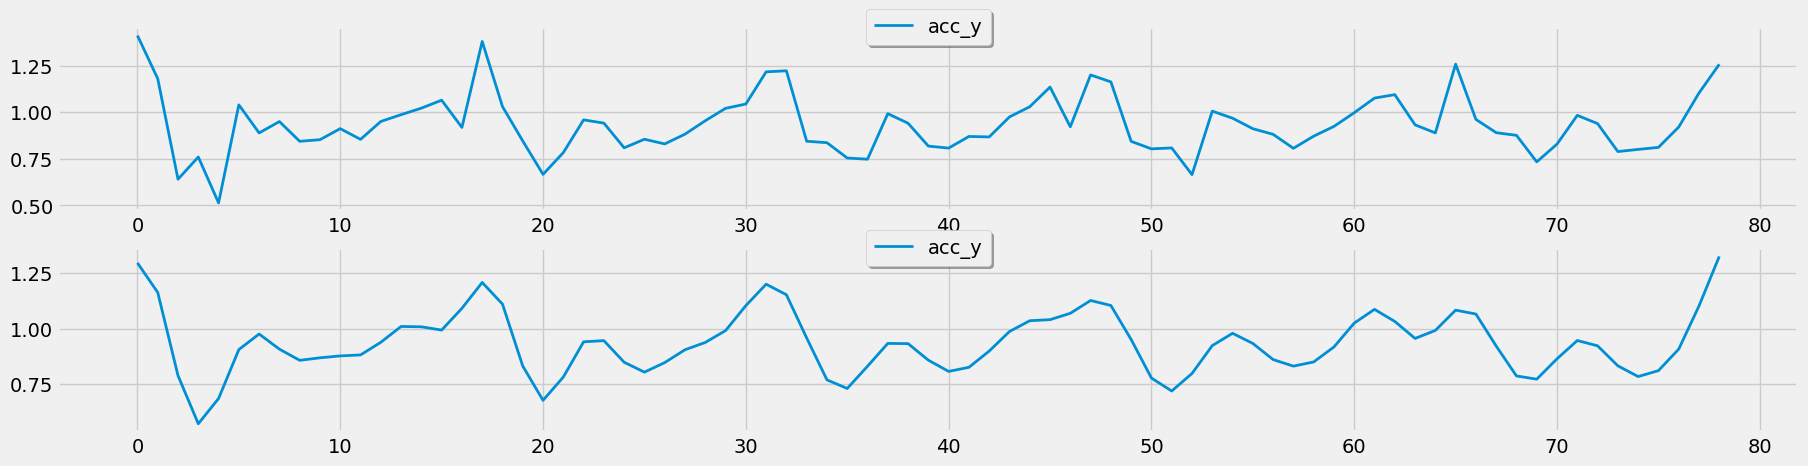

In [40]:
LowPass = LowPassFilter()
fs = 1000/200
df_lowpass = LowPass.low_pass_filter(df_lowpass, 'acc_y', fs, 1.3,5)
fig , ax = plt.subplots(2,1, figsize=(20,5))
ax[0].plot(df_lowpass[df_lowpass['set']==45]['acc_y'].reset_index(drop = True), label='acc_y')
ax[1].plot(df_lowpass[df_lowpass['set']==45]['acc_y_lowpass'].reset_index(drop = True), label='acc_y')
#ax[1].plot(df_lowpass['acc_y_lowpass'].reset_index(drop=True), label='acc_y_lowpass')
ax[0].legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow = True, ncol = 5)
ax[1].legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow = True, ncol = 5)
plt.show()

In [41]:

for col in predictor_column:
    LowPass = LowPassFilter()
    fs = 1000/200
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, 1.3,5)
    df_lowpass[col] = df_lowpass[col+'_lowpass']
    del df_lowpass[col+'_lowpass']
    
df_lowpass
    

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977007,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.008515,0.973137,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,-0.008450,0.966876,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024359,0.962305,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.022092,0.959566,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0


In [42]:
PCA = PrincipalComponentAnalysis()
df_pca = df_lowpass.copy()

In [43]:
pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_column)

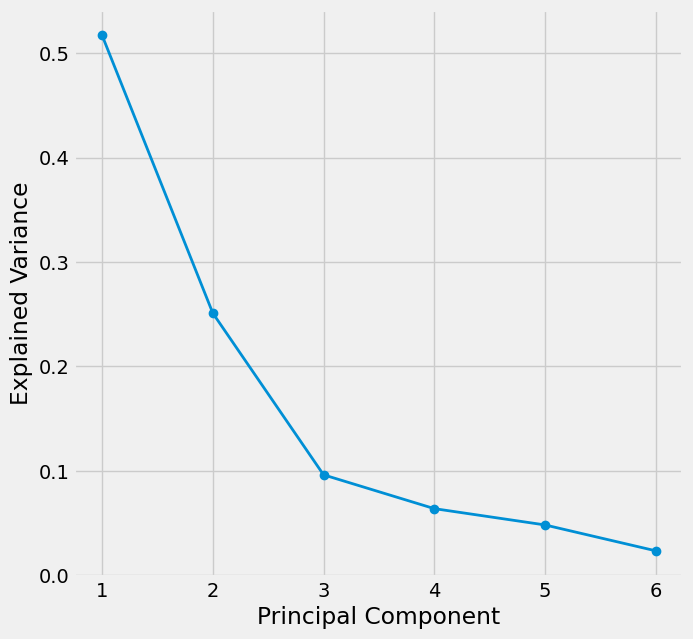

In [46]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(1, len(predictor_column)+1), pc_values, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()


In [47]:
df_pca = PCA.apply_pca(df_pca, predictor_column, 3)

In [48]:
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977007,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.312888,-0.068728,0.010508
2019-01-11 15:08:05.400,0.008515,0.973137,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.311954,-0.067674,-0.000371
2019-01-11 15:08:05.600,-0.008450,0.966876,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.311602,-0.074974,-0.031591
2019-01-11 15:08:05.800,-0.024359,0.962305,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.312107,-0.086087,-0.032409
2019-01-11 15:08:06.000,-0.022092,0.959566,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.311372,-0.092119,-0.012375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.342884,-0.155862,-0.004715
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.364800,-0.158982,0.028850
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.361304,-0.160677,0.010459


In [50]:
df_square = df_pca.copy()
acc_r = df_square['acc_x']**2 + df_square['acc_y']**2 + df_square['acc_z']**2
gyr_r = df_square['gyr_x']**2 + df_square['gyr_y']**2 + df_square['gyr_z']**2

df_square['acc_r'] = np.sqrt(acc_r)
df_square['gyr_r'] = np.sqrt(gyr_r)



In [51]:
df_square

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977007,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.312888,-0.068728,0.010508,0.979677,3.222503
2019-01-11 15:08:05.400,0.008515,0.973137,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.311954,-0.067674,-0.000371,0.975442,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966876,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.311602,-0.074974,-0.031591,0.969582,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962305,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.312107,-0.086087,-0.032409,0.966339,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959566,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.311372,-0.092119,-0.012375,0.964687,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.342884,-0.155862,-0.004715,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.364800,-0.158982,0.028850,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.361304,-0.160677,0.010459,1.047919,2.329568


In [52]:
df_temporal = df_square.copy()
NumAbs = NumericalAbstraction()
predictor_column = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']